In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


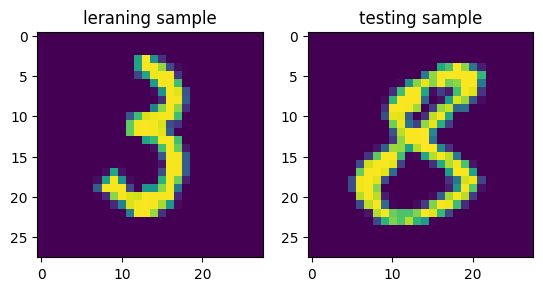

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(x_train[1234])
ax.set_title('leraning sample')
ax = fig.add_subplot(1,2,2)
plt.imshow(x_test[1234])
ax.set_title('testing sample')
plt.show()

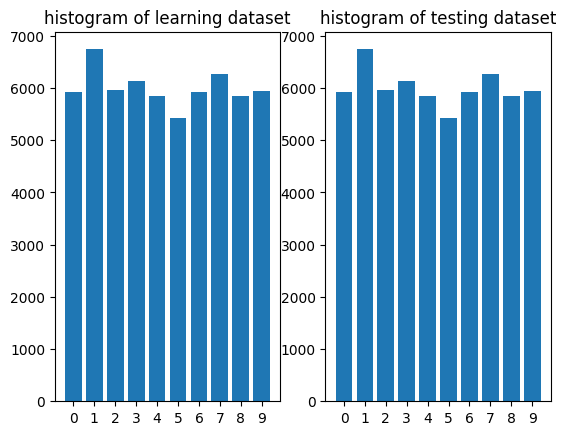

In [8]:
train_histogram = np.histogram(y_train)
test_histogram = np.histogram(y_test)
_, axs = plt.subplots(1,2)
axs[0].set_xticks(range(10))
axs[0].bar(range(10), train_histogram[0])
axs[0].set_title('histogram of learning dataset')
axs[1].set_xticks(range(10))
axs[1].bar(range(10), train_histogram[0])
axs[1].set_title('histogram of testing dataset')
plt.show()

In [10]:
x_train = (x_train - 0.0) / (255.0-0.0)
x_test = (x_test - 0.0) / (255.0-0.0)

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


c:\Users\ldhsp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), 
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
hist = model.fit(x_train, y_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4873 - loss: 1.9050 - val_accuracy: 0.8140 - val_loss: 0.8420
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8221 - loss: 0.7418 - val_accuracy: 0.8697 - val_loss: 0.5287
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8696 - loss: 0.5055 - val_accuracy: 0.8874 - val_loss: 0.4247
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8862 - loss: 0.4242 - val_accuracy: 0.8961 - val_loss: 0.3773
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8952 - loss: 0.3783 - val_accuracy: 0.9026 - val_loss: 0.3502
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8995 - loss: 0.3554 - val_accuracy: 0.9067 - val_loss: 0.3304
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9071 - loss: 0.3350 - val_accuracy: 0.9101 - val_loss: 0.3173
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9097 - loss: 0.3169 - 

In [15]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9345 - loss: 0.2220


[0.1967156082391739, 0.9433000087738037]

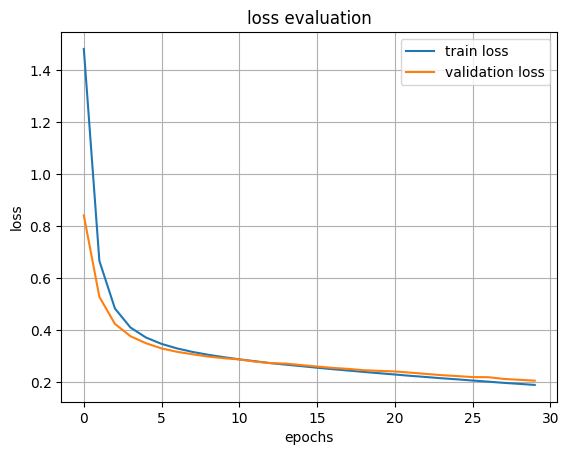

In [16]:
plt.title('loss evaluation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

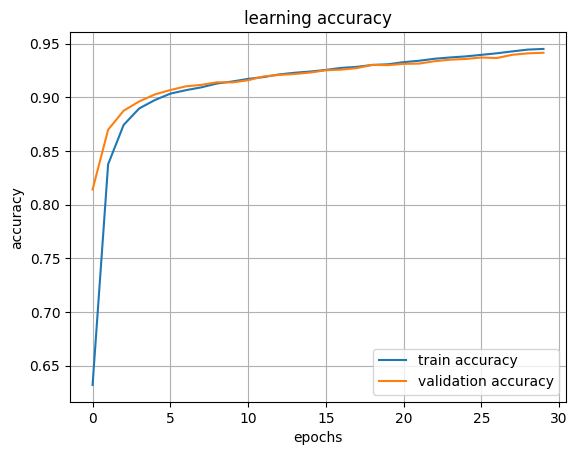

In [17]:
plt.title('learning accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


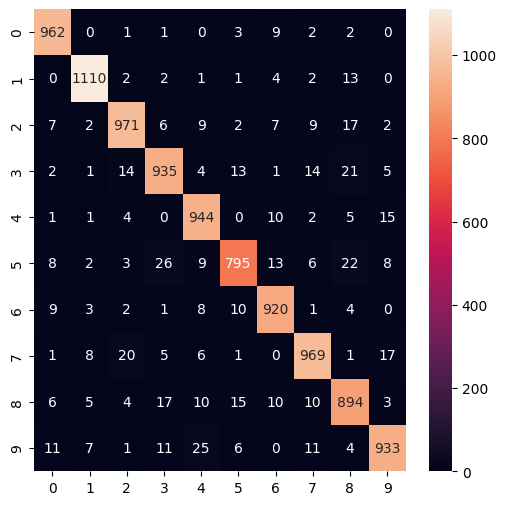

In [20]:
plt.figure(figsize=(6,6))
predicted_value = model.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predicted_value, axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [22]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f')%
          (i, np.max(cm[i]), np.sum(cm[i]), np.max(cm[i])/np.sum(cm[i])))

[[ 962    0    1    1    0    3    9    2    2    0]
 [   0 1110    2    2    1    1    4    2   13    0]
 [   7    2  971    6    9    2    7    9   17    2]
 [   2    1   14  935    4   13    1   14   21    5]
 [   1    1    4    0  944    0   10    2    5   15]
 [   8    2    3   26    9  795   13    6   22    8]
 [   9    3    2    1    8   10  920    1    4    0]
 [   1    8   20    5    6    1    0  969    1   17]
 [   6    5    4   17   10   15   10   10  894    3]
 [  11    7    1   11   25    6    0   11    4  933]]


label = 0	(962/980)	accuracy = 0.982
label = 1	(1110/1135)	accuracy = 0.978
label = 2	(971/1032)	accuracy = 0.941
label = 3	(935/1010)	accuracy = 0.926
label = 4	(944/982)	accuracy = 0.961
label = 5	(795/892)	accuracy = 0.891
label = 6	(920/958)	accuracy = 0.960
label = 7	(969/1028)	accuracy = 0.943
label = 8	(894/974)	accuracy = 0.918
label = 9	(933/1009)	accuracy = 0.925
